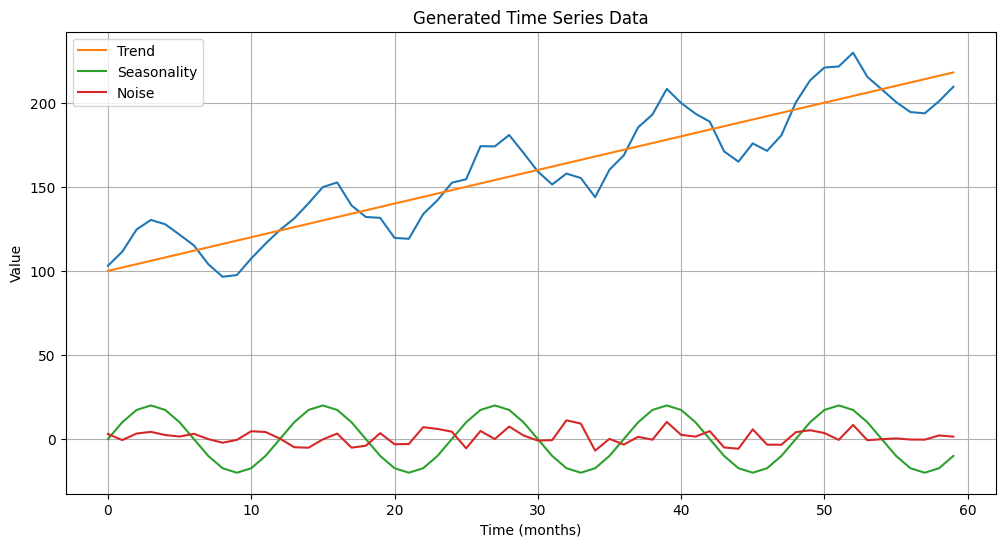

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 60
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
B = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / B)
noise = np.random.normal(0, sigma, n)

time_series = trend + seasonality + noise

plt.figure(figsize=(12, 6))
plt.plot(t, time_series)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("Generated Time Series Data")
plt.grid(True)
plt.plot(t, trend, label="Trend")
plt.plot(t, seasonality, label="Seasonality")
plt.plot(t, noise, label="Noise")
plt.legend()
plt.show()


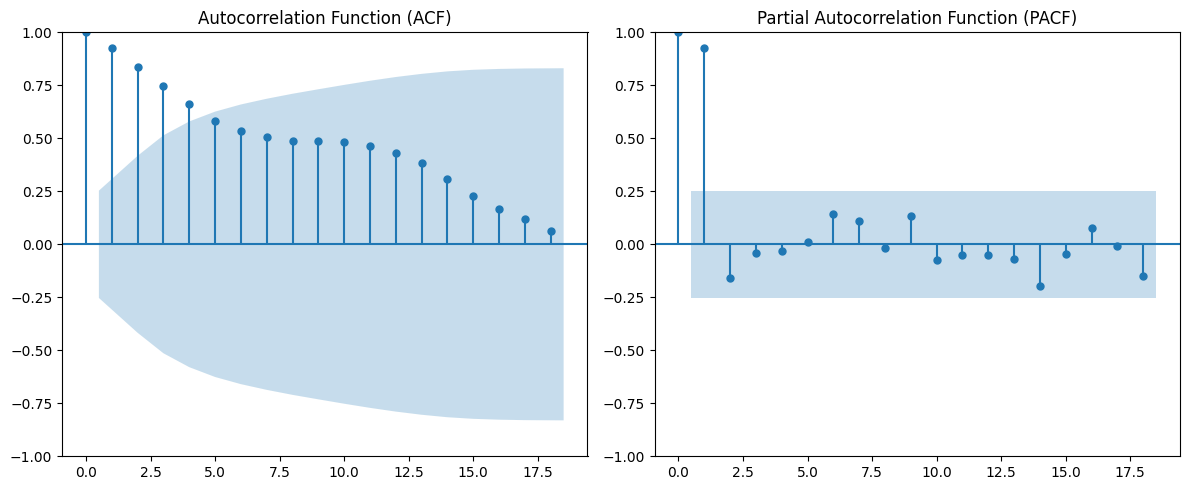

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(time_series, ax=axes[0], title="Autocorrelation Function (ACF)")
plot_pacf(time_series, ax=axes[1], title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series)
print("ADF Statistic:", adf_test[0])
print("P-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {value}")

if adf_test[1] <= 0.05:
    print("\nConclusion: The time series appears stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The time series appears non-stationary (fail to reject the null hypothesis).")

ADF Statistic: 0.4591179409220562
P-value: 0.9835760973554386
Critical Values:
	1%: -3.5745892596209488
	5%: -2.9239543084490744
	10%: -2.6000391840277777

Conclusion: The time series appears non-stationary (fail to reject the null hypothesis).


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model with integrated order 0 for both non-seasonal and seasonal components
# You might need to adjust the other orders (p, q, P, Q) based on ACF/PACF plots
sarima_model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -209.351
Date:                            Mon, 27 Oct 2025   AIC                            428.702
Time:                                    16:47:03   BIC                            439.174
Sample:                                         0   HQIC                           432.798
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9964      0.004    240.428      0.000       0.988       1.005
ma.L1         -0.3670      0.147   

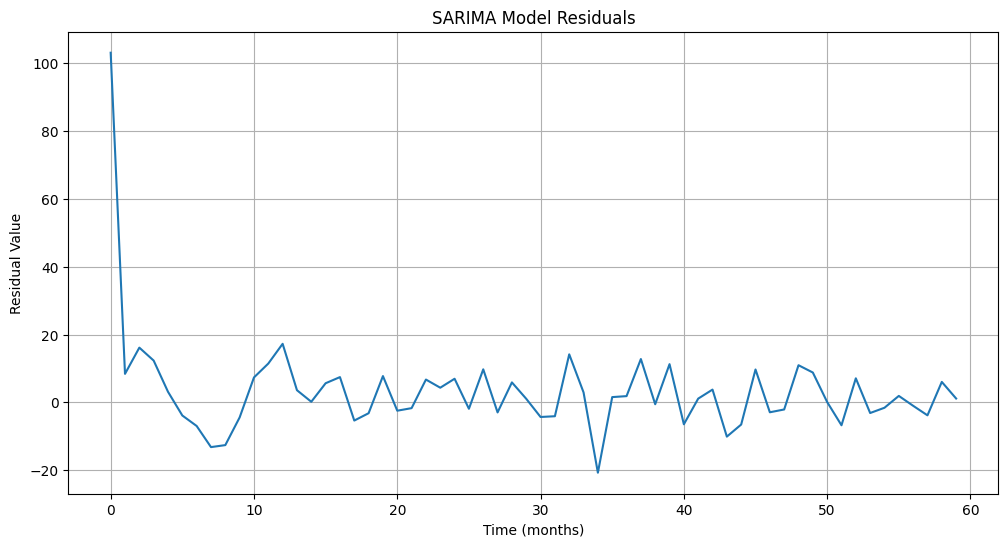


Ljung-Box Test Results:


,lb_stat,lb_pvalue
10,6.872839,0.737393


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = sarima_results.resid

plt.figure(figsize=(12, 6))
plt.plot(t, residuals)
plt.xlabel("Time (months)")
plt.ylabel("Residual Value")
plt.title("SARIMA Model Residuals")
plt.grid(True)
plt.show()

ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test Results:")
display(ljungbox_test)

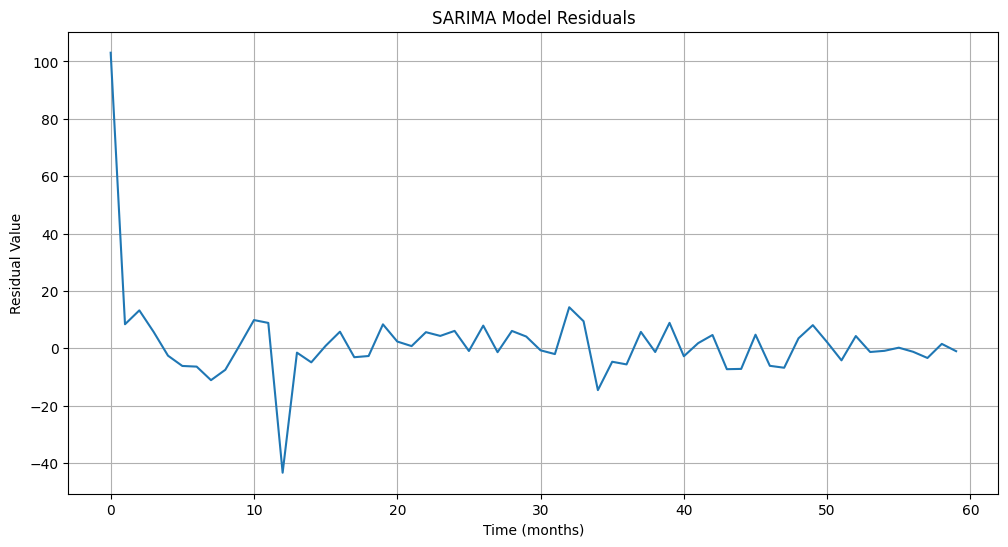


Ljung-Box Test Results:


,lb_stat,lb_pvalue
10,1.457852,0.999061


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = sarima_results.resid

plt.figure(figsize=(12, 6))
plt.plot(t, residuals)
plt.xlabel("Time (months)")
plt.ylabel("Residual Value")
plt.title("SARIMA Model Residuals")
plt.grid(True)
plt.show()

ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test Results:")
display(ljungbox_test)

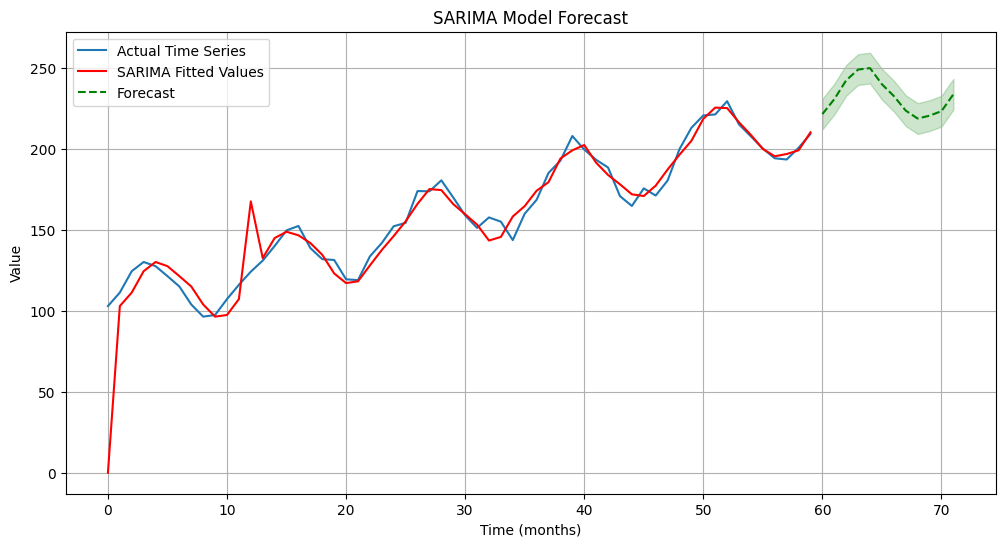

In [ ]:
forecast_steps = 12  # Number of steps to forecast
forecast = sarima_results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(t, sarima_results.fittedvalues, color='red', label="SARIMA Fitted Values")
plt.plot(np.arange(n, n + forecast_steps), mean_forecast, color='green', linestyle='--', label="Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), confidence_intervals[:, 0], confidence_intervals[:, 1], color='green', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

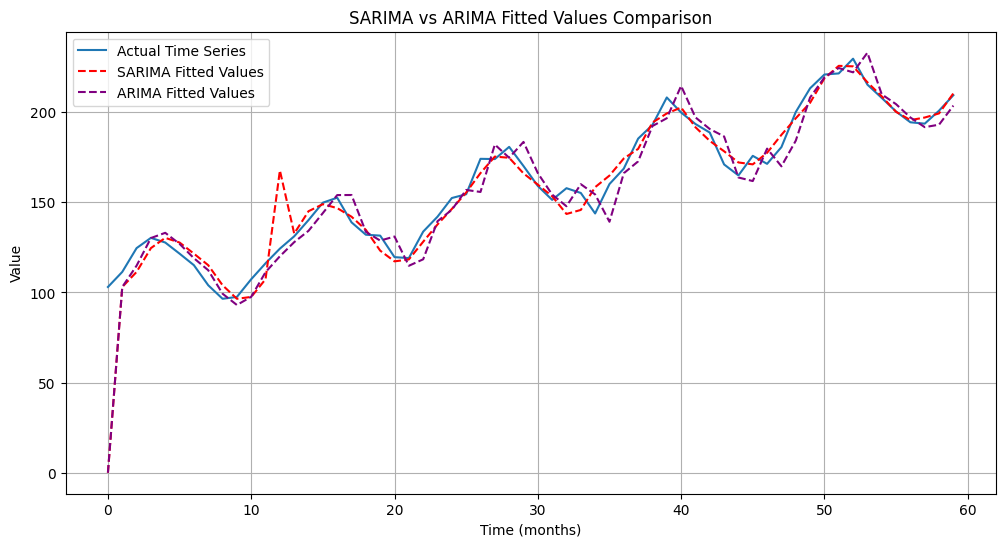

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(t, sarima_results.fittedvalues, color='red', linestyle='--', label="SARIMA Fitted Values")
plt.plot(t, arima_results.fittedvalues, color='purple', linestyle='--', label="ARIMA Fitted Values")
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA vs ARIMA Fitted Values Comparison")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Define the split point (e.g., using a specific index or a ratio)
split_point = int(len(time_series) * 0.8) # Example: 80% for training

# Split the data into training and testing sets
train_data = time_series[:split_point]
test_data = time_series[split_point:]

print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")

# If you need the corresponding time indices for plotting or other operations
t_train = t[:split_point]
t_test = t[split_point:]

Training data length: 48
Testing data length: 12


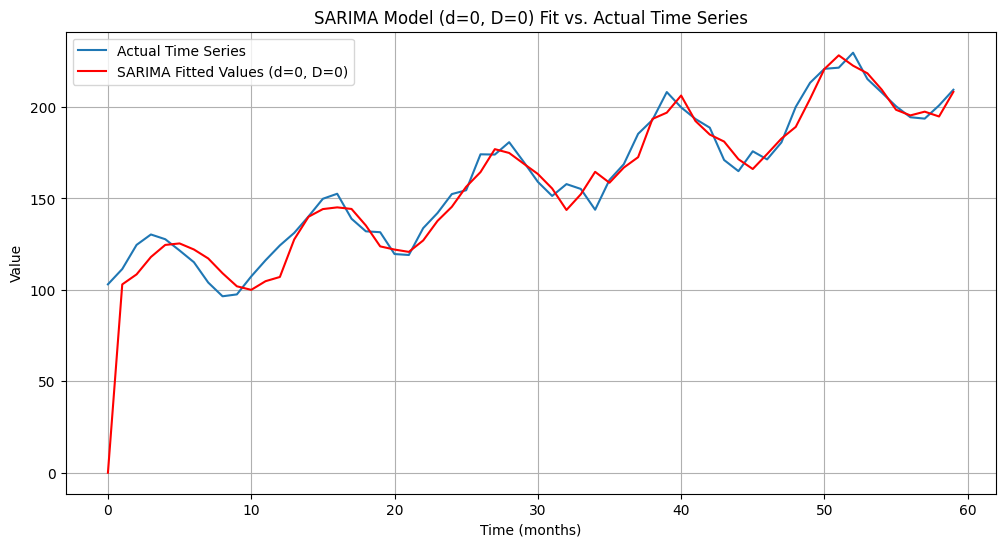

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(t, sarima_results.fittedvalues, color='red', label="SARIMA Fitted Values (d=0, D=0)")
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA Model (d=0, D=0) Fit vs. Actual Time Series")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (no seasonality)
# You might need to adjust the order (p, d, q) based on ACF/PACF plots and stationarity test
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_results = arima_model.fit()
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -211.776
Date:                Mon, 27 Oct 2025   AIC                            429.551
Time:                        16:36:07   BIC                            435.784
Sample:                             0   HQIC                           431.984
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4946      0.287      1.722      0.085      -0.068       1.058
ma.L1         -0.0977      0.341     -0.286      0.775      -0.767       0.571
sigma2        76.5335     16.850      4.542      0.0

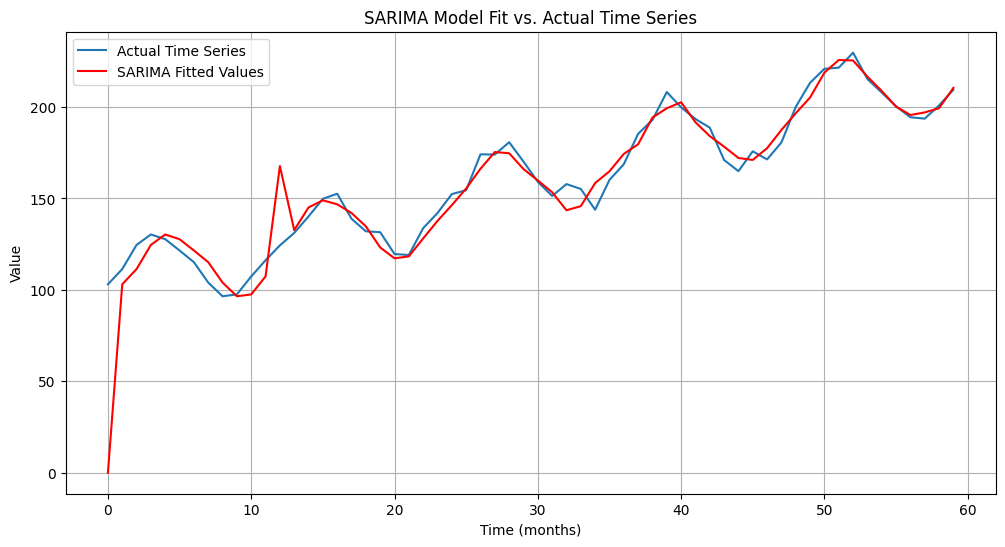

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(t, sarima_results.fittedvalues, color='red', label="SARIMA Fitted Values")
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA Model Fit vs. Actual Time Series")
plt.grid(True)
plt.legend()
plt.show()

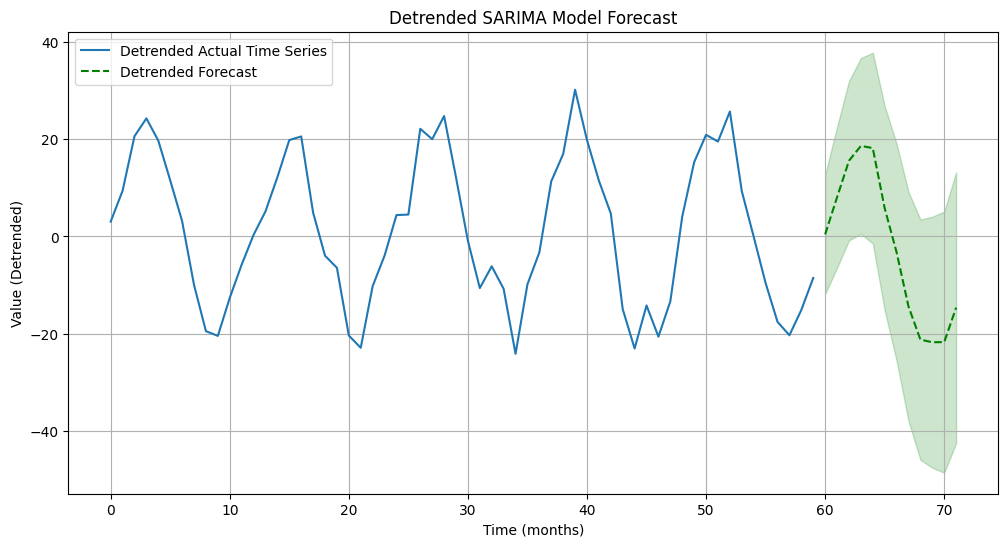

In [ ]:
# Remove trend from actual time series
detrended_time_series = time_series - trend

# Get the forecast and confidence intervals
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Remove trend from the forecast
# We need to generate the trend values for the forecast period
forecast_t = np.arange(n, n + forecast_steps)
forecast_trend = beta0 + beta1 * forecast_t
detrended_mean_forecast = mean_forecast - forecast_trend
detrended_confidence_intervals = confidence_intervals - forecast_trend[:, np.newaxis]


plt.figure(figsize=(12, 6))
plt.plot(t, detrended_time_series, label="Detrended Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), detrended_mean_forecast, color='green', linestyle='--', label="Detrended Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), detrended_confidence_intervals[:, 0], detrended_confidence_intervals[:, 1], color='green', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value (Detrended)")
plt.title("Detrended SARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

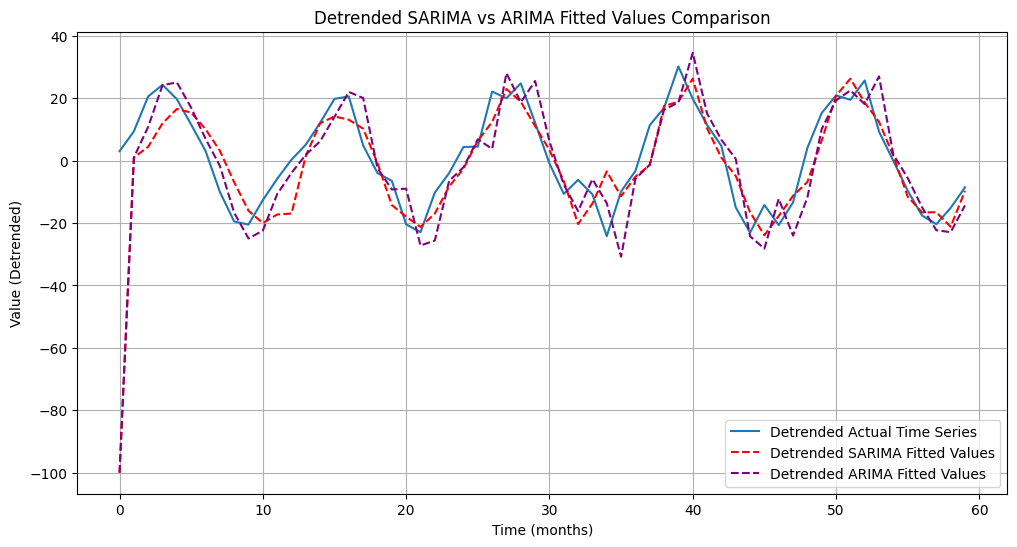

In [ ]:
# Remove trend from actual time series
detrended_time_series = time_series - trend

# Remove trend from SARIMA fitted values
detrended_sarima_fitted = sarima_results.fittedvalues - trend

# Remove trend from ARIMA fitted values
detrended_arima_fitted = arima_results.fittedvalues - trend


plt.figure(figsize=(12, 6))
plt.plot(t, detrended_time_series, label="Detrended Actual Time Series")
plt.plot(t, detrended_sarima_fitted, color='red', linestyle='--', label="Detrended SARIMA Fitted Values")
plt.plot(t, detrended_arima_fitted, color='purple', linestyle='--', label="Detrended ARIMA Fitted Values")

# Optional: Add detrended forecasts for comparison over the forecast period
# You would need to calculate detrended forecasts for ARIMA as well if you want to show future comparison

plt.xlabel("Time (months)")
plt.ylabel("Value (Detrended)")
plt.title("Detrended SARIMA vs ARIMA Fitted Values Comparison")
plt.grid(True)
plt.legend()
plt.show()

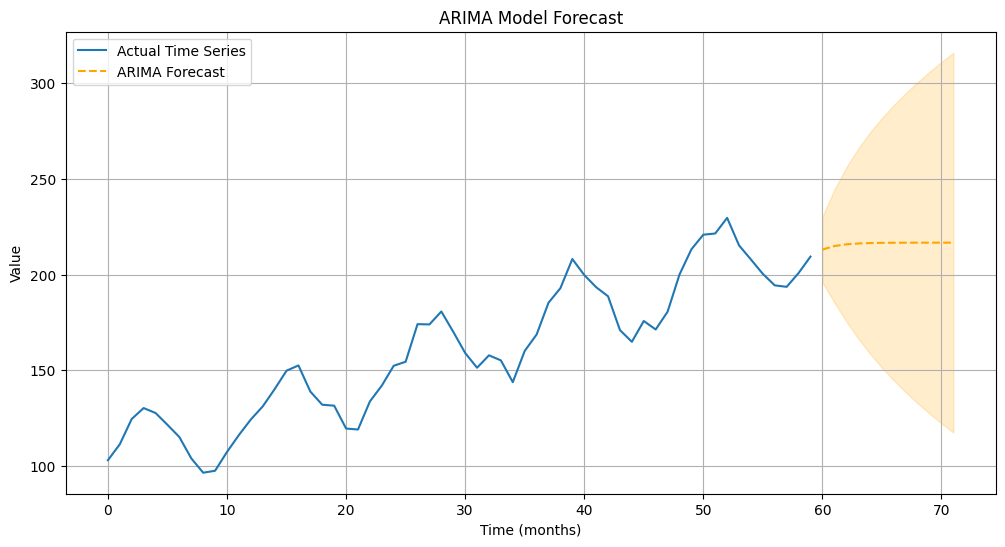

In [ ]:
forecast_steps = 12  # Number of steps to forecast
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), arima_mean_forecast, color='orange', linestyle='--', label="ARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), arima_confidence_intervals[:, 0], arima_confidence_intervals[:, 1], color='orange', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("ARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

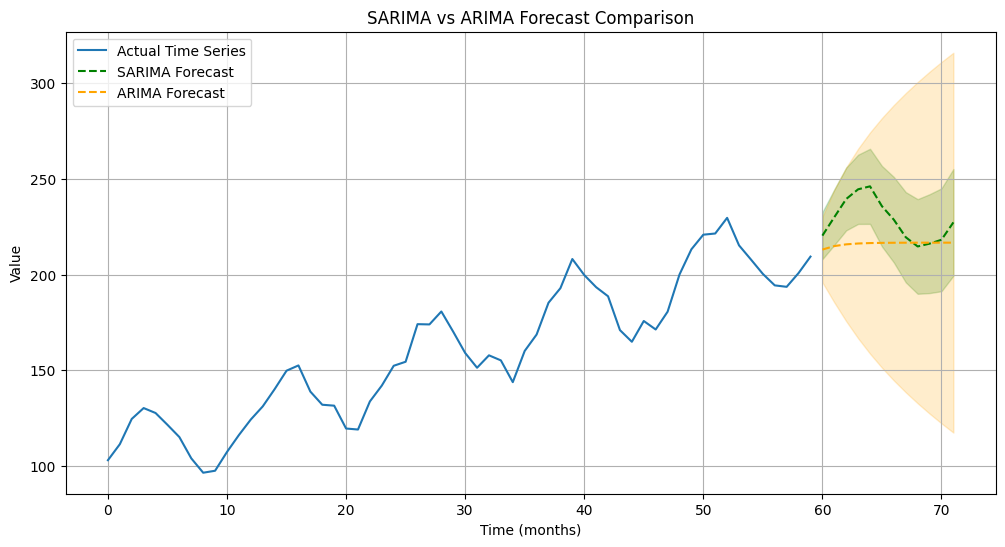

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), mean_forecast, color='green', linestyle='--', label="SARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), confidence_intervals[:, 0], confidence_intervals[:, 1], color='green', alpha=0.2)
plt.plot(np.arange(n, n + forecast_steps), arima_mean_forecast, color='orange', linestyle='--', label="ARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), arima_confidence_intervals[:, 0], arima_confidence_intervals[:, 1], color='orange', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA vs ARIMA Forecast Comparison")
plt.grid(True)
plt.legend()
plt.show()

# comparaison

Training data length: 48
Testing data length: 12
Naive Forecast value: 179.41


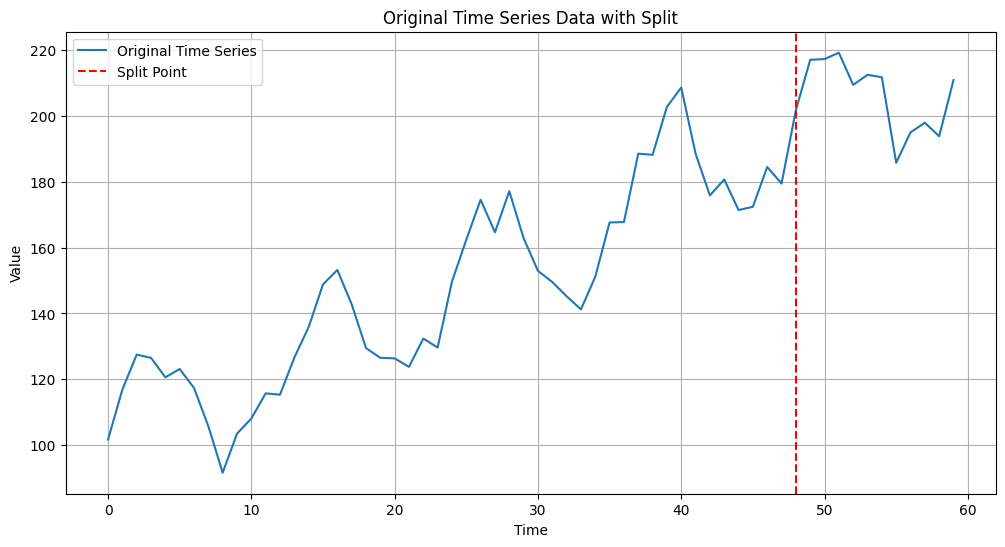


Naive Forecast MAE: 26.56
Naive Forecast MSE: 812.94
Naive Forecast RMSE: 28.51


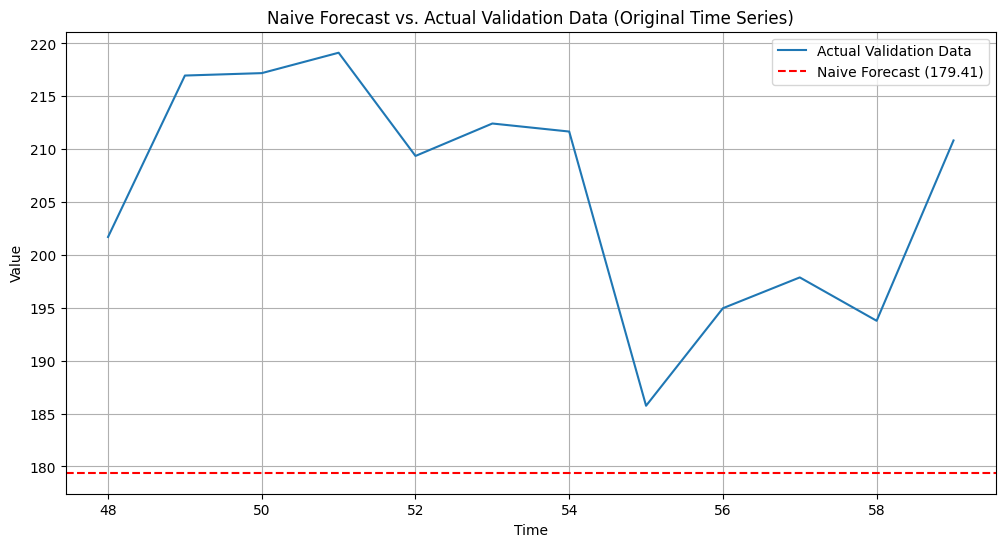

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error # Moved import here

# Define the time series data within this cell
n = 60
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
B = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / B)
noise = np.random.normal(0, sigma, n)

time_series = trend + seasonality + noise


# Define the split point based on the length of the original time_series
# Let's use an 80/20 split as an example
split_point = int(len(time_series) * 0.8) # Example: 80% for training

# Split the series and time data
time_train = t[:split_point]
series_train = time_series[:split_point] # Use original time_series for training
time_valid = t[split_point:]
series_valid = time_series[split_point:] # Use original time_series for validation

# Naive forecast: the last known value of the training data
naive_forecast = series_train[-1]

print(f"Training data length: {len(series_train)}")
print(f"Testing data length: {len(series_valid)}") # Corrected variable name
print(f"Naive Forecast value: {naive_forecast:.2f}")

# Plotting the original time series with the split point
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Original Time Series")
plt.axvline(x=t[split_point], color='red', linestyle='--', label="Split Point")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Time Series Data with Split")
plt.grid(True)
plt.legend()
plt.show()


# Calculate evaluation metrics for the naive forecast
# To compare it with the validation series, we need to create an array of this value
naive_forecast_series = np.full_like(series_valid, naive_forecast)

# Calculate evaluation metrics
mae = mean_absolute_error(series_valid, naive_forecast_series)
mse = mean_squared_error(series_valid, naive_forecast_series)
rmse = np.sqrt(mse) # Calculate RMSE as the square root of MSE

print(f"\nNaive Forecast MAE: {mae:.2f}")
print(f"Naive Forecast MSE: {mse:.2f}")
print(f"Naive Forecast RMSE: {rmse:.2f}")

# Plot the actual validation data and the naive forecast
plt.figure(figsize=(12, 6))
plt.plot(time_valid, series_valid, label="Actual Validation Data")
plt.axhline(y=naive_forecast, color='red', linestyle='--', label=f"Naive Forecast ({naive_forecast:.2f})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Naive Forecast vs. Actual Validation Data (Original Time Series)")
plt.grid(True)
plt.legend()
plt.show()

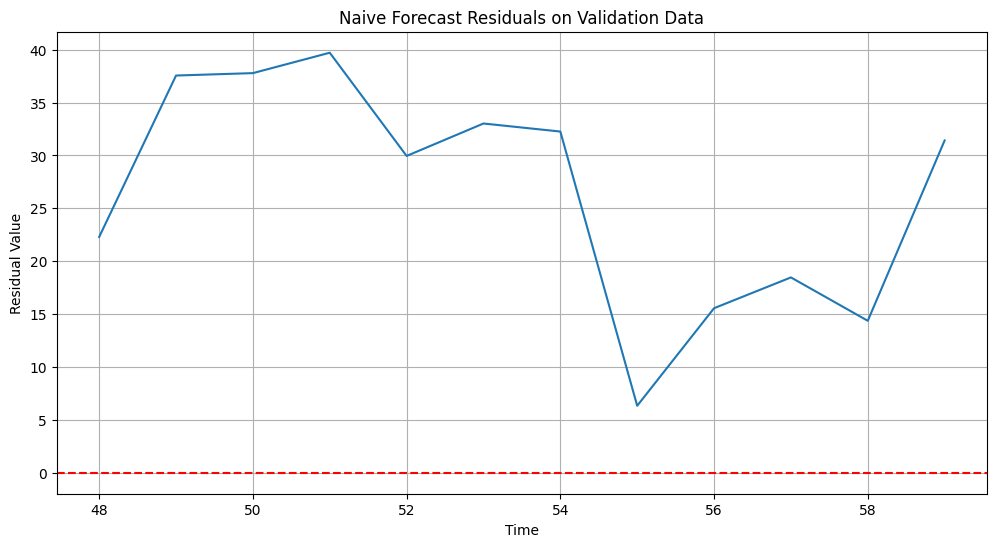

--- Naive Forecast Baseline Metrics ---
MAE: 26.56
MSE: 812.94
RMSE: 28.51
---------------------------------------

Naive Forecast Residuals (y - y_hat):


array([22.28801589, 37.55270598, 37.78134497, 39.71009019, 29.95031419,
       33.01728107, 32.25740769,  6.33126883, 15.55413836, 18.46581585,
       14.36533003, 31.41617434])

In [12]:
# Calculate residuals for the naive forecast on the validation data
naive_residuals = series_valid - naive_forecast_series

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(time_valid, naive_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.title("Naive Forecast Residuals on Validation Data")
plt.grid(True)
plt.show()

# Display the naive forecast evaluation metrics as a baseline
print("--- Naive Forecast Baseline Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print("---------------------------------------")

# Display the naive residuals
print("\nNaive Forecast Residuals (y - y_hat):")
display(naive_residuals)